In [11]:
import scipy.io.wavfile as wav
import numpy as np
import speechpy
import os
import librosa
import matplotlib.pyplot as plt

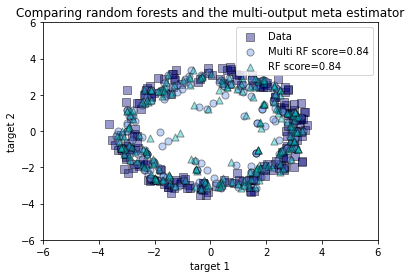

In [1]:
# Author: Tim Head <betatim@gmail.com>
#
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.multioutput import MultiOutputRegressor


# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(200 * rng.rand(600, 1) - 100, axis=0)
y = np.array([np.pi * np.sin(X).ravel(), np.pi * np.cos(X).ravel()]).T
y += (0.5 - rng.rand(*y.shape))

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=400, test_size=200, random_state=4)

max_depth = 30
regr_multirf = MultiOutputRegressor(RandomForestRegressor(n_estimators=100,
                                                          max_depth=max_depth,
                                                          random_state=0))
regr_multirf.fit(X_train, y_train)

regr_rf = RandomForestRegressor(n_estimators=100, max_depth=max_depth,
                                random_state=2)
regr_rf.fit(X_train, y_train)

# Predict on new data
y_multirf = regr_multirf.predict(X_test)
y_rf = regr_rf.predict(X_test)

# Plot the results
plt.figure()
s = 50
a = 0.4
plt.scatter(y_test[:, 0], y_test[:, 1], edgecolor='k',
            c="navy", s=s, marker="s", alpha=a, label="Data")
plt.scatter(y_multirf[:, 0], y_multirf[:, 1], edgecolor='k',
            c="cornflowerblue", s=s, alpha=a,
            label="Multi RF score=%.2f" % regr_multirf.score(X_test, y_test))
plt.scatter(y_rf[:, 0], y_rf[:, 1], edgecolor='k',
            c="c", s=s, marker="^", alpha=a,
            label="RF score=%.2f" % regr_rf.score(X_test, y_test))
plt.xlim([-6, 6])
plt.ylim([-6, 6])
plt.xlabel("target 1")
plt.ylabel("target 2")
plt.title("Comparing random forests and the multi-output meta estimator")
plt.legend()
plt.show()

In [3]:
y

array([[ 1.47777849,  2.37218316],
       [ 2.22271246,  2.84083005],
       [ 3.09931766,  0.99357876],
       ...,
       [-3.40060859, -0.18559885],
       [-2.94107284,  0.79511451],
       [-3.02118271,  1.59756689]])

In [4]:
y_multirf

array([[-3.29854846e-01,  3.07077430e+00],
       [-3.41538722e-01, -1.74303529e+00],
       [ 1.92984122e+00,  1.43033883e+00],
       [ 3.02156371e+00,  5.76824911e-01],
       [-3.94981296e-01, -2.82826924e+00],
       [ 2.73125891e+00, -9.60095918e-01],
       [-2.32753131e+00, -2.16200066e+00],
       [ 1.55997152e+00, -2.36233453e+00],
       [-3.35543000e+00, -1.59869539e-01],
       [ 2.99558015e+00, -1.96399286e-01],
       [ 3.09446614e+00,  1.30148780e-02],
       [-2.28689131e+00, -1.23933084e+00],
       [ 7.80939086e-01, -2.83430986e+00],
       [-7.49609987e-01,  3.03869408e+00],
       [-2.28674675e+00, -1.23983305e+00],
       [-1.96904147e+00, -2.71836568e+00],
       [ 3.02243794e+00, -9.69861737e-01],
       [ 3.88415825e-01,  2.83691803e+00],
       [ 1.84977421e+00,  1.20715469e+00],
       [-2.33675876e+00,  2.29725059e+00],
       [ 2.45510288e+00, -4.72718522e-01],
       [-1.19657099e+00,  2.54173664e+00],
       [ 1.84277439e+00,  2.84556536e+00],
       [-3.

In [5]:
y_rf

array([[-3.08936406e-01,  3.02660425e+00],
       [-5.55903095e-01, -1.59428840e+00],
       [ 1.90460318e+00,  1.47033352e+00],
       [ 2.99832337e+00,  6.18085656e-01],
       [-2.21067556e-01, -2.72016209e+00],
       [ 2.50896921e+00, -1.17573923e+00],
       [-2.26583962e+00, -2.00682580e+00],
       [ 1.40842092e+00, -2.28295636e+00],
       [-3.24681075e+00, -2.62355179e-01],
       [ 2.87272154e+00, -5.75007906e-01],
       [ 3.11013897e+00, -5.81324558e-02],
       [-2.30442113e+00, -1.11698302e+00],
       [ 7.62477019e-01, -2.80941101e+00],
       [-7.56041079e-01,  2.99599722e+00],
       [-2.30413201e+00, -1.11798743e+00],
       [-1.94936293e+00, -2.71235730e+00],
       [ 3.12800765e+00, -9.85968364e-01],
       [ 4.28817089e-01,  2.79381156e+00],
       [ 1.92270046e+00,  1.49972490e+00],
       [-2.37851030e+00,  2.28854022e+00],
       [ 2.29149431e+00, -5.23656019e-01],
       [-1.32036252e+00,  2.52700130e+00],
       [ 1.69129248e+00,  2.74549858e+00],
       [-3.